In [4]:
# import jupyter notebook magic to show plots and automatically load modules
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
# import python packages for solving the problem
import pandas as pd
import math
import numpy as np
from datetime import datetime
import os 
import sys
from ast import literal_eval

import seaborn as sns
import matplotlib.pyplot as plt

#import customized modules
src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
sys.path[0] = src_dir
from modules import *

In [6]:
# file names of the data
cta_entry_fname = '../data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv'
cta_station_fname = '../data/CTA_-_System_Information_-_List_of__L__Stops.csv'

In [9]:
# read data into data frames
df_cta_entry = pd.read_csv(cta_entry_fname)
# convert the date in string to datetime
df_cta_entry['date'] = df_cta_entry.date.apply(lambda x: str_to_date(x))
df_cta_station = pd.read_csv(cta_station_fname)

In [10]:
# rename columns of the data frame for easier access
df_cta_station.columns = df_cta_station.columns.str.lower().str.replace(' ', '_')

# HIghest average ridership

Find the top 5 stations with the highest average ridership per day.

In [122]:
# group each ride by each station, and calculate the mean
day_type = ['W']
df_rides = df_cta_entry[df_cta_entry.daytype.isin(day_type)]
df_rides = pd.DataFrame(df_rides.groupby(['stationname']).rides.mean())
# sort the station in order of highest mean to lowest mean per day
df_rides = df_rides.sort_values('rides', ascending=False)
# station withe the highest mean is the first station
highest_mean = pd.DataFrame(df_rides.iloc[:5]).reset_index()

In [123]:
highest_mean

,stationname,rides
0,Clark/Lake,18052.295759
1,Lake/State,16328.424083
2,Chicago/State,14196.820918
3,95th/Dan Ryan,12459.540141
4,Fullerton,11811.760053


In [124]:
df_rides_per_day = df_cta_entry[df_cta_entry['stationname'].isin(highest_mean.stationname)
                               & (df_cta_entry.daytype.isin(day_type))]

### Plot for the average ridership for each station in descending order

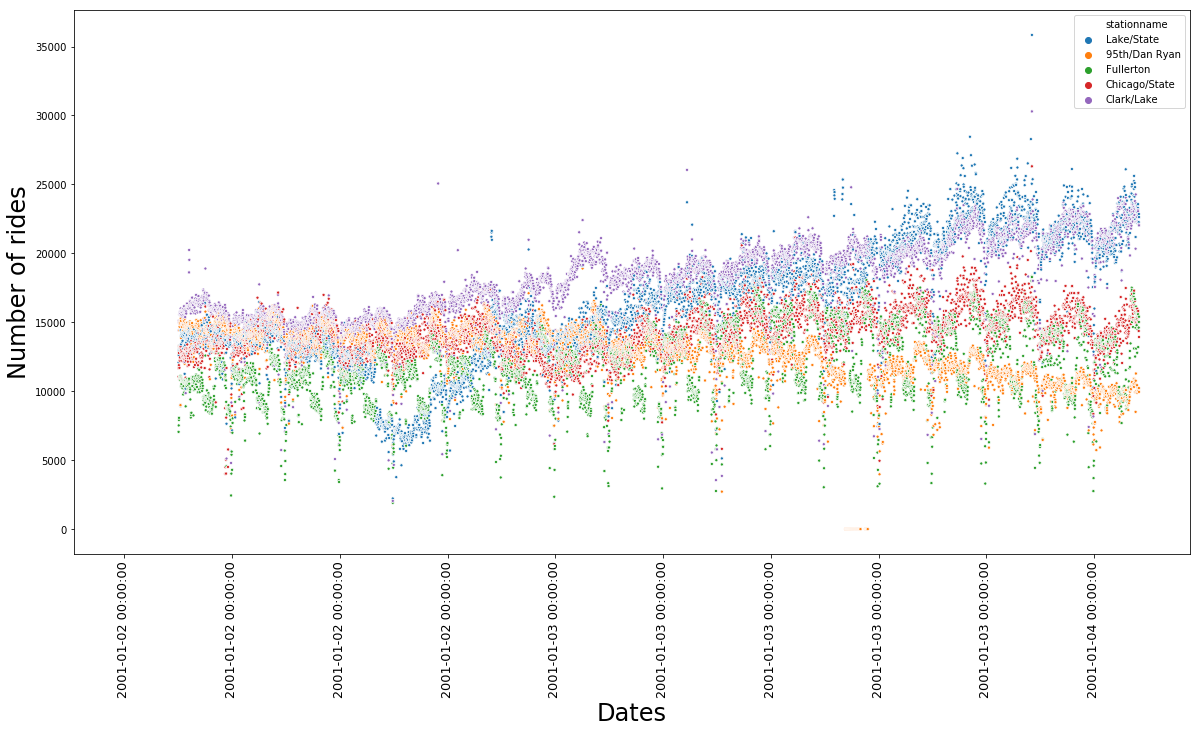

In [154]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(x='date', y='rides', hue='stationname', data=df_rides_per_day, ax=ax, s=10)
for item in ax.get_xticklabels():
    item.set_rotation(90)
#figure style
fontsize=16
ax.set_xlabel('Dates', fontsize=1.5*fontsize)
ax.set_xticklabels(df_rides_per_day.date, fontsize=0.8*fontsize)
ax.set_ylabel('Number of rides', fontsize=1.5*fontsize)
fig.savefig('../result/highest_station_ridership_{}.png'.format(''.join(day_type)), transparent=True,bbox_inches='tight' )